<a href="https://colab.research.google.com/github/MAB1144-Python/Machine-Learning-and-Deep-Learning/blob/master/clustering_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

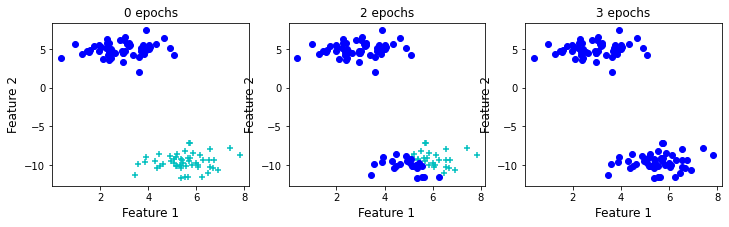

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(t):
    return 1/(1+np.exp(-t))

def prediction(theta,x):
    return theta[0]*theta[1]*x[0]+theta[2]*x[1]

def label(theta,x):
    return int(round(sigmoid(prediction(theta,x))))

def gradient(theta, X, y, j):
    sum = 0
    for i in range(X.shape[0]): # one epoch
        if j==0:
            X_aux = 1 # intercept
        else:
            X_aux = X[i,j-1]  # slope
        sum += (sigmoid(prediction(theta,X[i])) - y[i])*X_aux
    return sum/X.shape[0]

def fit(theta, X, y, epochs):
    for e in range(epochs):
        for j in range(len(theta)):
            theta[j] -= gradient(theta,X,y,j)
    return theta

X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=10)

fig,axs = plt.subplots(1,3,figsize=(12,3))

theta_0 = [8.7, 9.1, 6.4]
# A figure for eac number  of epochs model
for i,ax in zip([0,2,3], axs):
    theta = fit(theta_0, X, y, i)  # fit the model using i epochs
    label_y = []
    for row in range(len(y)):
        label_y.append(label(theta,X[row]))   # labeled results vector  
    # incorrect labeled samples 
    ax.scatter(X[y!=label_y,0], X[y!=label_y,1],c='c', marker='+') 
    # correct labeled samples
    ax.scatter(X[y==label_y,0], X[y==label_y,1],c='b', marker='o') 
    ax.set_title(format(i)+' epochs') 
    ax.set_xlabel('Feature 1', fontsize=12); ax.set_ylabel('Feature 2',
                  fontsize=12)      
plt.show()
